In [1]:
!pip install levenshtein

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from Levenshtein import ratio, distance
from itertools import product

In [3]:
AngTextPath = '../data/AngOrdtext'
AngDatePath = '../data/AngOrddate'
AngIDPath = '../data/AngOrdID'
EngTextPath = '../data/EngOrdtext'
EngDatePath = '../data/EngOrddate'


# Functions

In [4]:
def read_text_data(filepath):    
    sentences = []
    for line in open(filepath):
        words = line.split()
        sentence = [word for word in words]
        sentences.append(sentence)
    return sentences

def read_data(filepath):
    all_words = []
    for line in open(filepath):
        words = line.split()
        sentence = [word for word in words]
        all_words.extend(sentence)
    return all_words

def get_word_count(sentences):
    all_words = [word for sentence in sentences for word in sentence]
    word_count = len(all_words)
    distinct_word_count = len(set(all_words))
    return all_words, word_count, distinct_word_count

def get_rank_frequency(all_words):
    word_frequency = {}
    for word in all_words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))
    word_frequency = pd.DataFrame(list(word_frequency.items()), columns=['Word', 'Frequency'])
    return word_frequency

def max_similarity(text1, text2):
    """
    return normalized levenshtein similarity between two strings
    """
    return 1 - distance(text1, text2) / max(len(text1), len(text2))

# Read data

In [5]:
ang_text = read_text_data(AngTextPath)
ang_date = read_data(AngDatePath)
ang_id = read_data(AngIDPath)
ang_df = pd.DataFrame({'Text': ang_text,
                        'Date': ang_date,
                        'ID': ang_id})
ang_df['Text'] = ang_df['Text'].apply(lambda x: ' '.join(x))
ang_df['WordCount'] = ang_df['Text'].apply(lambda x: len(x.split()))
ang_df['Date'] = ang_df['Date'].astype(int)


In [6]:
eng_text = read_text_data(EngTextPath)
eng_date = read_data(EngDatePath)

eng_data = {'Text': eng_text,
        'Date': eng_date}
eng_df = pd.DataFrame(eng_data)
eng_df['Text'] = eng_df['Text'].apply(lambda x: ' '.join(x))
eng_df['WordCount'] = eng_df['Text'].apply(lambda x: len(x.split()))
eng_df.head()

,Text,Date,WordCount
0,oportet nos quos deus prefecit temporaliter re...,1060,381
1,hee sunt diuisiones terarum quas eadwardus rex...,1061,116
2,in nomine domini nostri iesu cristi saluatoris...,1062,697
3,diuine prospectionis qua reguntur omnia conflu...,1063,236
4,quecunque scripta sunt dicit apostolus ad nost...,1065,641


In [7]:
ang_df['Date'] = ang_df['Date'].astype(int)
eng_df['Date'] = eng_df['Date'].astype(int)
print("Ang doc", len(ang_df['Text']), "Eng doc", len(eng_df['Text']), "Total doc", len(ang_df['Text']) + len(eng_df['Text']))
ang_all_words = []
for text in ang_df['Text']:
    tokens = text.split()
    ang_all_words.extend(tokens)

eng_all_words = []
for text in eng_df['Text']:
    tokens = text.split()
    eng_all_words.extend(tokens)

print("Ang tokens", len(ang_all_words))
print("Eng tokens", len(eng_all_words))
print("Total tokens", len(ang_all_words)+ len(eng_all_words))
print("Ang distinct words", len(set(ang_all_words)))
print("Eng distinct words", len(set(eng_all_words)))
print("ang date", ang_df['Date'].min(), ang_df['Date'].max())
print("eng date", eng_df['Date'].min(), eng_df['Date'].max())
print("ang second date", ang_df['Date'].sort_values().unique()[1])

Ang doc 1432 Eng doc 16976 Total doc 18408
Ang tokens 488612
Eng tokens 3564443
Total tokens 4053055
Ang distinct words 60575
Eng distinct words 111999
ang date 0 1066
eng date 1060 1310
ang second date 589


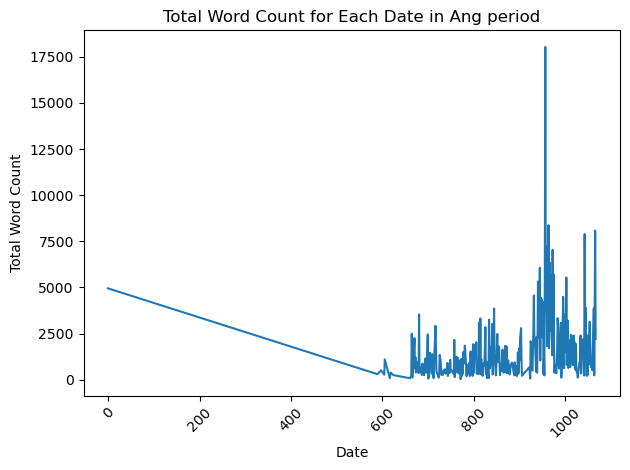

In [8]:
date_wordcount = ang_df.groupby('Date')['WordCount'].sum()

# Creating a bar plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Ang period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [9]:

ang_spe_df = ang_df[(ang_df['Date'] >= 900) & (ang_df['Date'] <= 1066)]
eng_spe_df = eng_df[(eng_df['Date'] >= 1067) & (eng_df['Date'] <= 1198)]

ang_spe_df.loc[:, 'Text'] = ang_spe_df['Text'].astype(str)

eng_spe_df.loc[:, 'Text'] = eng_spe_df['Text'].astype(str)



/var/folders/ng/y9lqb7fd74129k77l2w1fg0h0000gn/T/ipykernel_26078/278542361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ang_spe_df.loc[:, 'Text'] = ang_spe_df['Text'].astype(str)
/var/folders/ng/y9lqb7fd74129k77l2w1fg0h0000gn/T/ipykernel_26078/278542361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_spe_df.loc[:, 'Text'] = eng_spe_df['Text'].astype(str)


# Intersection on specified period
ang: 900 - 1066

norman: 1067 - 1198

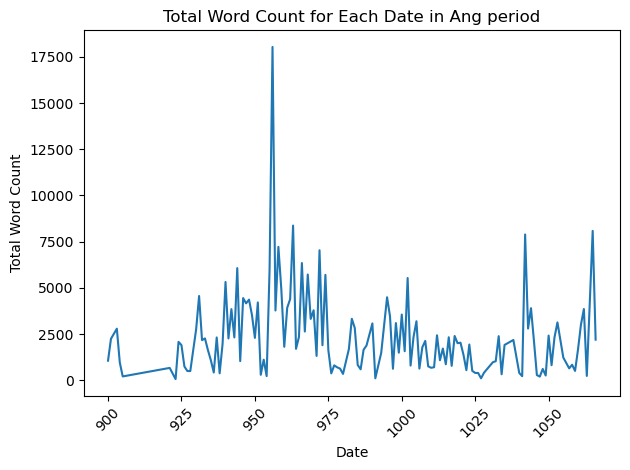

In [10]:
date_wordcount = ang_spe_df.groupby('Date')['WordCount'].sum()

# Creating a bar plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Ang period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

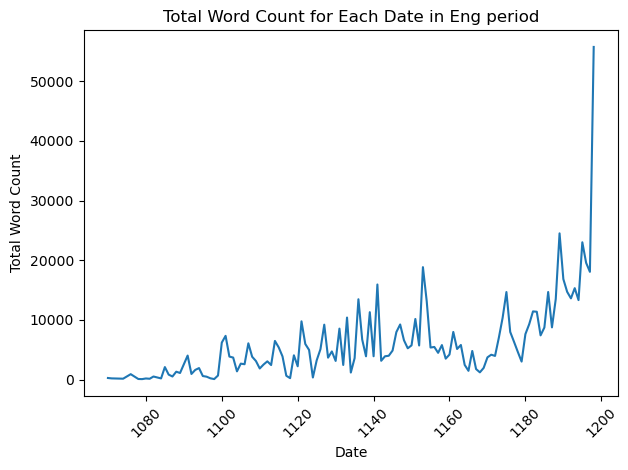

In [11]:
date_wordcount = eng_spe_df.groupby('Date')['WordCount'].sum()

# Creating a bar plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Eng period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [12]:
print("Ang", len(ang_spe_df['Text']), "Eng", len(eng_spe_df['Text']))

Ang 861 Eng 4050


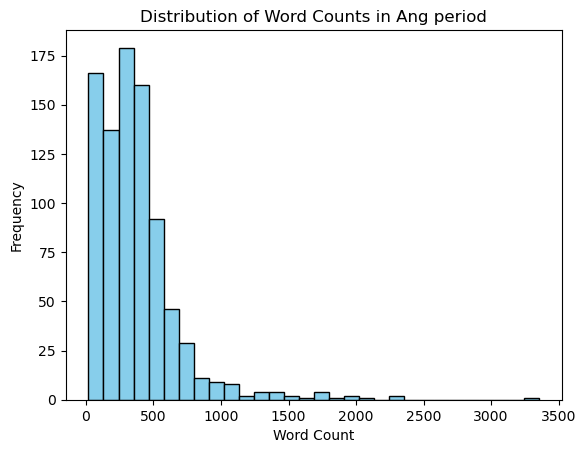

In [13]:
wordcounts = ang_spe_df['WordCount']

# Creating a histogram
plt.hist(wordcounts, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Ang period')
plt.show()

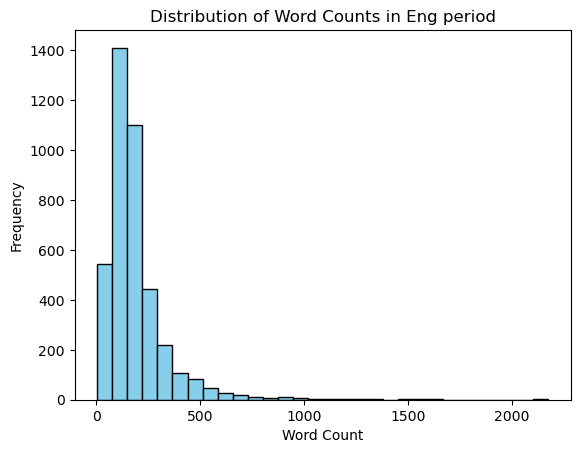

In [14]:
wordcounts = eng_spe_df['WordCount']

# Creating a histogram
plt.hist(wordcounts, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Eng period')
plt.show()

In [15]:
# some mistakes, but it's fun to mention them
ang_spe_all_letters,_, ang_spe_distinct_letter_count = get_word_count(ang_spe_df['Text'])
eng_spe_all_letters,_, eng_spe_distinct_letter_count = get_word_count(eng_spe_df['Text'])
print('Ang distinct letter count:', ang_spe_distinct_letter_count)
print('Eng distinct letter count:', eng_spe_distinct_letter_count)

Ang distinct letter count: 31
Eng distinct letter count: 24


In [16]:

# Tokenize text and gather words into a list
ang_spec_all_words = []
for text in ang_spe_df['Text']:
    tokens = text.split()
    ang_spec_all_words.extend(tokens)

eng_spec_all_words = []
for text in eng_spe_df['Text']:
    tokens = text.split()
    eng_spec_all_words.extend(tokens)

# Example of the first 10 words
print(ang_spec_all_words[:10])
print(eng_spec_all_words[:10])

['omnipotentia', 'diuine', 'maiestatis', 'ubique', 'presidente', 'et', 'sine', 'fine', 'cuncta', 'gubernante']
['wilelmus', 'rex', 'anglie', 'omnibus', 'ministris', 'et', 'fidelibus', 'suis', 'francis', 'et']


In [17]:
print("Ang", len(ang_spec_all_words))
print("Eng", len(eng_spec_all_words))
print("Ang set", len(set(ang_spec_all_words)))
print("Eng set", len(set(eng_spec_all_words)))

Ang 321818
Eng 756696
Ang set 43384
Eng set 46054


In [18]:
ang_spe_rank_frequency = get_rank_frequency(ang_spec_all_words)
eng_spe_rank_frequency = get_rank_frequency(eng_spec_all_words)

ang_spe_words_set = set(ang_spe_rank_frequency['Word'])
eng_spe_words_set = set(eng_spe_rank_frequency['Word'])
print("distinct ang word length", len(ang_spe_words_set))
print("distinct eng word length", len(eng_spe_words_set))

common_words_spe = ang_spe_words_set.intersection(eng_spe_words_set)

common_words_list_spe = list(common_words_spe)


print("common word length", len(common_words_list_spe))

distinct ang word length 43384
distinct eng word length 46054
common word length 7940


In [19]:
ang_spe_rank_frequency.head(10)

,Word,Frequency
0,et,12140
1,ego,10582
2,on,5930
3,in,4514
4,minister,3742
5,to,3173
6,of,3151
7,episcopus,2586
8,cum,1997
9,dux,1849


In [41]:
common_words_list_spe[:10]

['nominatam',
 'nemus',
 'cotes',
 'scriptis',
 'tenebris',
 'arce',
 'solutum',
 'publica',
 'mutari',
 'continet']

In [42]:
common_words_spe_df = pd.DataFrame(common_words_list_spe, columns=['Word'])
common_words_spe_df['ang_freq'] = common_words_spe_df['Word'].apply(lambda x: ang_spe_rank_frequency[ang_spe_rank_frequency['Word'] == x]['Frequency'].values[0])
common_words_spe_df['eng_freq'] = common_words_spe_df['Word'].apply(lambda x: eng_spe_rank_frequency[eng_spe_rank_frequency['Word'] == x]['Frequency'].values[0])
common_words_spe_df['sum_freq'] = common_words_spe_df['ang_freq'] + common_words_spe_df['eng_freq']
common_words_spe_df = common_words_spe_df.sort_values(by='sum_freq', ascending=False)

In [43]:
column_names = ['Word', 'ang_freq', 'eng_freq', 'sum_freq']
np.savetxt(r'exp_result/common_words_spe.txt', common_words_spe_df, fmt='%s')

# Standardize words based on edit distance

See eda.py.

In general, only store pairs of words that has a similarity score relieves the memory drastically.